In [1]:
import os
os.chdir('../../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_train = pd.read_csv('data/clean/clean_data_train.csv', index_col=False)
df_test = pd.read_csv('data/clean/clean_data_test.csv', index_col=False)

In [3]:
df_train.head()

,team1,team1score,team2,team2score,match_type,match_stage,player0_id,player0_rating,player0_kd,player1_id,...,player7_kd,player8_id,player8_rating,player8_kd,player9_id,player9_rating,player9_kd,team1_Ranking,team2_Ranking,team_1_won
0,FaZe,0,Spirit,3,BO5,GF,9960.0,1.16,1.14,11816.0,...,1.06,18317,1.07,1.04,7716.0,0.99,0.93,2.0,14.0,0
1,Spirit,2,Falcons,0,BO3,SF,21167.0,1.46,1.47,16920.0,...,1.05,11777,1.05,1.02,922.0,0.83,0.73,14.0,11.0,1
2,MOUZ,0,FaZe,2,BO3,SF,18850.0,1.13,1.23,13666.0,...,1.13,8183,1.11,1.02,429.0,0.94,0.83,5.0,2.0,0
3,ENCE,1,Falcons,2,BO3,QF,16848.0,1.20,1.36,19114.0,...,1.14,11777,1.07,1.05,922.0,0.86,0.76,48.0,11.0,0
4,FaZe,2,G2,0,BO3,QF,9960.0,1.16,1.17,11816.0,...,0.92,9618,0.96,0.89,10096.0,0.89,0.76,2.0,6.0,1


In [4]:
numerical_features = ['team1_Ranking', 'team2_Ranking']
for i in range(10):
    numerical_features.append(f'player{i}_rating')
    numerical_features.append(f'player{i}_kd')


X_train = df_train[numerical_features]
y_train = df_train['team_1_won']


X_test = df_test[numerical_features]
y_test = df_test['team_1_won']

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

accs = []

Cs = 2**np.linspace(-8, 5, 101)
log_reg_model = LogisticRegression(max_iter=1000, solver='liblinear')
cv = GridSearchCV(log_reg_model, param_grid={'penalty': ['l1', 'l2'],'C': Cs}, cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid={'C': array([3.90625000e-03, 4.27458477e-03, 4.67765119e-03, 5.11872423e-03,
       5.60138769e-03, 6.12956326e-03, 6.70754247e-03, 7.34002148e-03,
       8.03213927e-03, 8.78951941e-03, 9.61831573e-03, 1.05252623e-02,
       1.15177283e-02, 1.26037775e-02, 1.37922343e-02, 1.50927551e-02,
       1.6515...
       3.68075060e+00, 4.02782220e+00, 4.40762046e+00, 4.82323131e+00,
       5.27803164e+00, 5.77571678e+00, 6.32033049e+00, 6.91629785e+00,
       7.56846117e+00, 8.28211939e+00, 9.06307108e+00, 9.91766160e+00,
       1.08528346e+01, 1.18761886e+01, 1.29960383e+01, 1.42214829e+01,
       1.55624792e+01, 1.70299229e+01, 1.86357374e+01, 2.03929700e+01,
       2.23158987e+01, 2.44201473e+01, 2.67228134e+01, 2.92426064e+01,
       3.20000000e+01]),
                         'penalty': ['l1', 'l2']})

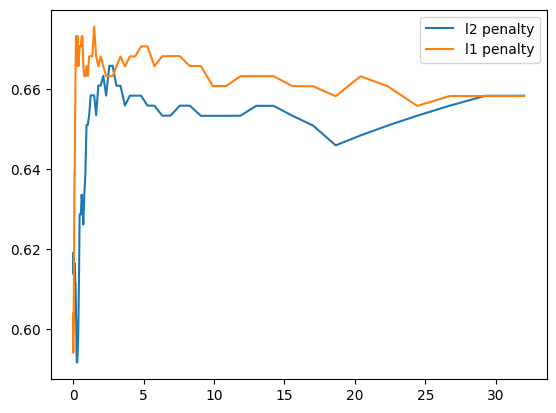

In [6]:
plt.plot(Cs, cv.cv_results_['mean_test_score'][::2], label = 'l2 penalty')
plt.plot(Cs, cv.cv_results_['mean_test_score'][1::2], label = 'l1 penalty')
plt.legend()


In [20]:
from sklearn.metrics import log_loss

log_reg_best = cv.best_estimator_

log_reg_best.fit(X_train, y_train)

y_pred = log_reg_best.predict(X_test)
y_pred_proba = log_reg_best.predict_proba(X_test)

print('Accuracy is', np.mean(y_pred == y_test))

print('Cross entropy score is ', log_loss(y_test, y_pred_proba))



Accuracy is 0.7352941176470589
Cross entropy score is  0.5568000560289074
Cross entropy score is  -0.5568000560289074


In [8]:
for i, coef in enumerate(log_reg_best.coef_[0]):
    print('Coef for ', log_reg_best.feature_names_in_[i], 'is', coef, '\n')


Coef for  team1_Ranking is -0.01840997809549724 

Coef for  team2_Ranking is 0.019130184920570892 

Coef for  player0_rating is 0.7501476109652755 

Coef for  player0_kd is 0.1607498675207617 

Coef for  player1_rating is 0.637297803251139 

Coef for  player1_kd is 1.4332043593170907 

Coef for  player2_rating is 0.5048755759956423 

Coef for  player2_kd is 0.20790629738160363 

Coef for  player3_rating is 0.5447465493214724 

Coef for  player3_kd is 0.1947449979003317 

Coef for  player4_rating is 0.7490837840590683 

Coef for  player4_kd is 0.9569999385628416 

Coef for  player5_rating is -0.08022816837174385 

Coef for  player5_kd is -1.7880271294115833 

Coef for  player6_rating is -0.25332678199604935 

Coef for  player6_kd is -1.1005897844190489 

Coef for  player7_rating is -0.10921770145222681 

Coef for  player7_kd is -0.6153916319242444 

Coef for  player8_rating is -0.8062044687801634 

Coef for  player8_kd is -1.448319506718841 

Coef for  player9_rating is -0.0206690379741

In [9]:
team_flip_train = df_train.copy()
team_flip_train['team1'], team_flip_train['team2'] = df_train['team2'], df_train['team1']
team_flip_train['team1_Ranking'], team_flip_train['team2_Ranking'] = df_train['team2_Ranking'], df_train['team1_Ranking']


for i in range(10):
    team_flip_train[f'player{i}_rating'] = df_train[f'player{9-i}_rating']
    team_flip_train[f'player{i}_kd'] = df_train[f'player{9-i}_kd']

team_flip_train['team_1_won'] = 1 - df_train['team_1_won']

In [10]:
team_flip_test = df_test.copy()
team_flip_test['team1'], team_flip_test['team2'] = df_test['team2'], df_test['team1']
team_flip_test['team1_Ranking'], team_flip_test['team2_Ranking'] = df_test['team2_Ranking'], df_test['team1_Ranking']

for i in range(10):
    team_flip_test[f'player{i}_rating'] = df_test[f'player{i}_rating']
    team_flip_test[f'player{i}_kd'] = df_test[f'player{i}_kd']

team_flip_test['team_1_won'] = 1 - df_test['team_1_won']


In [11]:
numerical_features = ['team1_Ranking', 'team2_Ranking']
for i in range(10):
    numerical_features.append(f'player{i}_rating')
    numerical_features.append(f'player{i}_kd')


X_flip_train = team_flip_train[numerical_features]
y_flip_train = team_flip_train['team_1_won']




In [12]:
n = len(X_train)
mask = np.random.randint(0,2,n)
X_rnd_flip = pd.concat((X_train[mask==0], X_flip_train[mask==1]))
y_rnd_flip = pd.concat((y_train[mask==0], y_flip_train[mask==1]))

In [13]:
accs = []

Cs = 2**np.linspace(-15, 5, 101)
log_reg_model = LogisticRegression(max_iter=1000, solver = 'liblinear')
cv = GridSearchCV(log_reg_model, param_grid={'penalty': ['l1', 'l2'], 'C': Cs}, cv=5)
cv.fit(X_rnd_flip, y_rnd_flip)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid={'C': array([3.05175781e-05, 3.50554918e-05, 4.02681858e-05, 4.62559987e-05,
       5.31341897e-05, 6.10351562e-05, 7.01109836e-05, 8.05363715e-05,
       9.25119975e-05, 1.06268379e-04, 1.22070312e-04, 1.40221967e-04,
       1.61072743e-04, 1.85023995e-04, 2.12536759e-04, 2.44140625e-04,
       2.8044...
       1.14869835e+00, 1.31950791e+00, 1.51571657e+00, 1.74110113e+00,
       2.00000000e+00, 2.29739671e+00, 2.63901582e+00, 3.03143313e+00,
       3.48220225e+00, 4.00000000e+00, 4.59479342e+00, 5.27803164e+00,
       6.06286627e+00, 6.96440451e+00, 8.00000000e+00, 9.18958684e+00,
       1.05560633e+01, 1.21257325e+01, 1.39288090e+01, 1.60000000e+01,
       1.83791737e+01, 2.11121266e+01, 2.42514651e+01, 2.78576180e+01,
       3.20000000e+01]),
                         'penalty': ['l1', 'l2']})

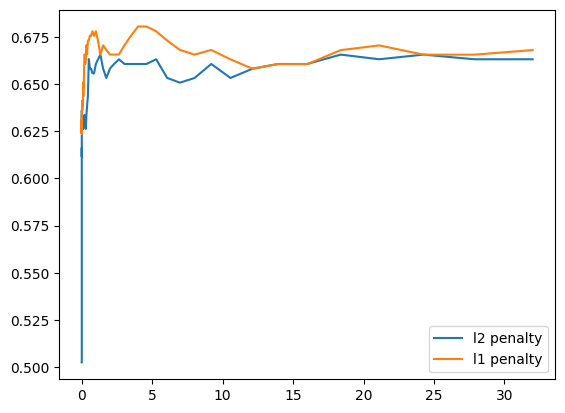

In [14]:
plt.plot(Cs, cv.cv_results_['mean_test_score'][::2], label = 'l2 penalty')
plt.plot(Cs, cv.cv_results_['mean_test_score'][1::2], label = 'l1 penalty')
plt.legend()


In [15]:
log_reg_best = cv.best_estimator_

log_reg_best.fit(X_rnd_flip, y_rnd_flip)

y_pred = log_reg_best.predict(X_test)

y_pred_proba = log_reg_best.predict_proba(X_test)

print('Accuracy is', np.mean(y_pred == y_test))

print('Cross entropy score is ', log_loss(y_test, y_pred_proba))

Accuracy is 0.6764705882352942
Cross entropy score is  0.5805423218570658


In [16]:
for i, coef in enumerate(log_reg_best.coef_[0]):
    print('Coef for ', log_reg_best.feature_names_in_[i], 'is', coef, '\n')


Coef for  team1_Ranking is -0.019119582117209464 

Coef for  team2_Ranking is 0.019365121605596267 

Coef for  player0_rating is 0.5525044740639957 

Coef for  player0_kd is -0.5672612155206105 

Coef for  player1_rating is 1.5520174250347016 

Coef for  player1_kd is 2.274783815976392 

Coef for  player2_rating is -0.11659009151891474 

Coef for  player2_kd is 0.3079787559953969 

Coef for  player3_rating is 0.9700880881318729 

Coef for  player3_kd is 1.3594757440611656 

Coef for  player4_rating is -1.0312837965003745 

Coef for  player4_kd is 1.6338013240874032 

Coef for  player5_rating is -0.653711924029632 

Coef for  player5_kd is -1.7428176919958434 

Coef for  player6_rating is 0.662122444546005 

Coef for  player6_kd is 0.06236709139838796 

Coef for  player7_rating is -0.5551428559565935 

Coef for  player7_kd is -0.3672018459134367 

Coef for  player8_rating is -0.9638460581284632 

Coef for  player8_kd is -2.0969041649221345 

Coef for  player9_rating is -0.78313783593489